In [ ]:
# importing libraries
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from copy import deepcopy
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import PCA

In [ ]:
# building the corpus
# the raw text from each file is inserted into a list of strings
# ground-truth labels for each document are also inserted into a list
raw_text = []
labels = []

topics = ['business', 'entertainment', 'politics', 'sport', 'tech']

for topic in topics:
  directory = os.fsencode(f'bbc/{topic}')
  text_pile = []
  for filename in os.listdir(directory):
      with open (f'bbc/{topic}/' + filename, 'r') as file:
          temp = ''
          for line in file.readlines():
              linetext = line.strip()
              temp += ''.join([i for i in linetext if not i.isdigit()]) + ' '
          text_pile.append(str(temp))
          
  raw_text += text_pile
  for i in range(len(text_pile)):
      labels.append(topic)

In [ ]:
# check the length of both lists to ensure they match
print(len(raw_text))
print(len(labels))

2225
2225


In [ ]:
# build a tfidf matrix from the raw text
tfidf = TfidfVectorizer(stop_words='english', min_df=200)
tfidf_matrix = tfidf.fit_transform(raw_text)
tfidf_array = tfidf_matrix.toarray()
print(tfidf_array.shape)

(2225, 191)


In [ ]:
# defining k-means function
def get_clusters(X, k):
    num_examples, dim = X.shape
    
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    centers_new = np.random.randn(k, dim) * std + mean   
    centers_old = np.zeros(centers_new.shape)
    
    labels = np.zeros(num_examples)
    distances = np.zeros((num_examples,k))
    
    error = np.linalg.norm(centers_new - centers_old)
    
    while error > 0.001:
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
            
        labels = np.argmin(distances, axis = 1)
        centers_old = deepcopy(centers_new)
        
        for i in range(k):
            centers_new[i] = np.mean(X[labels == i], axis=0)
            
        error = np.linalg.norm(centers_new - centers_old)
        
    return labels, centers_new

In [ ]:
# training the k-means model
labels_pred, centers = get_clusters(tfidf_array, 5)

In [ ]:
# define SSE function
def SSE(X, labels, centers):
    sse = 0
    n = X.shape[0]
    for i in range (n):
        sse += np.linalg.norm(X[i] - centers[labels[i]])
    return sse

In [ ]:
# get SSE
print(SSE(tfidf_array, labels_pred, centers))

1957.1510371364425


In [ ]:
# purity index, conputed by referencing the confusion matrix
def purity_index(labels_true, labels_pred):
    confusion_matrix = contingency_matrix(labels_true, labels_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 
print(purity_index(labels, labels_pred))

0.6485393258426966


In [ ]:
# display the documents in each cluster
for i in range(5):
    print("Cluster " + str(i+1) + ": ", end='')
    indices = []
    for j in range(len(labels_pred)):
        if labels_pred[j] == i:
            indices.append(j)
    for index in indices:
        print(str(index) + ", ", end='')
    print("\n")

Cluster 1: 0, 2, 4, 9, 10, 12, 16, 18, 23, 24, 26, 31, 33, 34, 37, 38, 46, 47, 49, 50, 51, 52, 54, 58, 61, 66, 69, 70, 73, 76, 77, 79, 81, 82, 83, 84, 87, 90, 91, 92, 94, 95, 96, 102, 103, 110, 111, 114, 115, 116, 117, 121, 123, 124, 125, 126, 129, 130, 131, 139, 141, 142, 144, 147, 149, 154, 157, 158, 159, 160, 161, 163, 165, 168, 170, 172, 173, 180, 187, 188, 190, 191, 193, 200, 201, 203, 207, 211, 215, 217, 219, 220, 221, 222, 227, 229, 232, 237, 240, 246, 248, 249, 250, 253, 258, 263, 264, 265, 268, 272, 275, 276, 277, 278, 279, 287, 290, 297, 298, 299, 300, 301, 302, 303, 306, 307, 309, 310, 311, 312, 313, 314, 315, 317, 318, 320, 322, 323, 324, 325, 327, 331, 332, 333, 334, 336, 337, 338, 340, 341, 345, 346, 348, 352, 353, 357, 358, 359, 361, 362, 365, 367, 368, 374, 377, 385, 390, 391, 392, 393, 395, 397, 398, 400, 402, 403, 405, 406, 408, 410, 411, 413, 416, 417, 418, 419, 420, 421, 423, 425, 426, 428, 430, 434, 436, 439, 440, 443, 445, 450, 453, 455, 457, 459, 461, 463, 464, 4

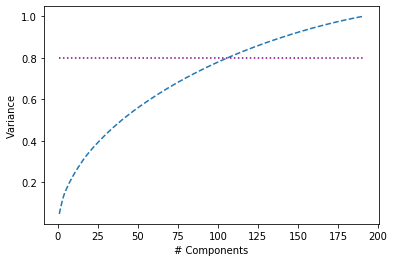

In [ ]:
# implement PCA to reduce the number of dimensions of the data
# determine the optimal number of components by attempting to retain ~0.8 variance (100 components)
pca = PCA()
pca.fit(tfidf_array)
plt.plot(range(1,192), pca.explained_variance_ratio_.cumsum(), ms=3, linestyle='--')
plt.plot(range(1,192), np.repeat(0.8, 191), c='purple', linestyle=':')
plt.xlabel('# Components')
plt.ylabel('Variance')
plt.show()

In [ ]:
# fit the data to the PCA model
pca = PCA(n_components=100)
tfidf_pca = pca.fit_transform(tfidf_array)

In [ ]:
# retrain the k-means model using the obtained PCA Scores
labels_pred, centers = get_clusters(tfidf_pca, 5)

In [ ]:
# SSE has decreased
print(SSE(tfidf_pca, labels_pred, centers))

1689.261672117668


In [ ]:
# converting notebook to html
os.system('jupyter nbconvert --to html BBC_Article_Clustering.ipynb')

0